# Short Course: Machine Learning for Exploration Geophysics

Hamburg, 10. - 12. March 2020

#### Kaggle competition 1: Pseudo Sonic Log Generation

Table of Content:
- [Packages](#Packages)
- [Import the dataset](#Import-the-dataset)
- [Train-Test Split](#Train-Test-Split)
- [Random-Forest-model](#Random-Forest-model)
- [Save-submission](#Save-submission)
- [Plot-predicted-results](#Plot-predicted-results)

## Packages

Let's first import all the packages: 
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a software library for data manipulation and analysis.
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [seaborn](https://seaborn.pydata.org/) is a statistical data visualization library based on matplotlib.
- [scikit-learn](https://scikit-learn.org/stable/) is a simple and efficient tools for predictive data analysis.

In [24]:
#!pip install pandas
#!pip install -U scikit-learn

#!python -m pip install -U pip
#!python -m pip install -U matplotlib

#!pip install pandas

#!pip install seaborn

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings('ignore')

print('Pandas:  ' + pd.__version__)
print('Numpy:   ' + np.__version__)
print('Sklearn: ' + sklearn.__version__)

Pandas:  0.24.2
Numpy:   1.17.4
Sklearn: 0.22.2.post1


## Import the dataset

A comma-separated values (CSV) file is a type of plain text file that is widely supported by machine learning applications. We can read a CSV file using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function into [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [26]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

Let us first visualize a few examples to see what columns there are, what information they contain, how the values are coded. We could use the following methods: 

- [head(self, n)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) - Return the first n rows,
- [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info) - Print a concise summary of a DataFrame,
- [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) - Generate descriptive statistics.

In [27]:
#df.head(10) #View first 10 data rows
#df.info()
df_train.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN,DTC
count,15393.000000,15393.000000,15393.000000,15393.000000,15393.000000,15393.000000,15393.000000,15393.000000
mean,8.432933,0.266576,50.056083,2.584102,2.806501,3.805319,2.410592,88.299237
std,1.841574,2.952129,55.833129,3.103238,10.615123,4.365461,0.182319,23.526068
min,5.946600,0.014500,1.038900,0.123600,0.169300,-0.023200,0.680600,50.278700
25%,6.633500,0.120200,16.215300,0.812400,0.799800,0.049700,2.235700,70.438600
50%,8.578100,0.187000,37.642100,1.815200,1.828000,2.605100,2.467200,79.766300
75%,8.671900,0.329000,61.100300,3.337400,3.464000,7.028600,2.564000,102.555400
max,21.064200,365.885000,1470.253400,121.505900,914.191200,28.106400,3.259700,155.980300


In [28]:
df_test.describe()

,CAL,CNC,GR,HRD,HRM,PE,ZDEN
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,8.407918,0.297933,49.388860,2.642560,14.920588,3.919196,2.411161
std,1.858915,3.372129,51.626049,4.376345,844.633958,4.406060,0.179901
min,5.930400,0.018300,1.388800,0.129200,0.134100,-0.019900,0.825500
25%,6.596075,0.120600,15.560400,0.800200,0.791125,0.050075,2.237775
50%,8.578100,0.188850,37.064200,1.814200,1.832700,3.762550,2.464650
75%,8.671900,0.329300,61.229000,3.333075,3.458600,7.130950,2.563000
max,18.261300,237.562300,580.772600,206.718200,60467.761700,27.943200,3.193200


In [29]:
feature_names = df_train.columns[:-1].tolist()
print(feature_names)
label_names = df_train.columns[-1:].tolist()
print(label_names)

['CAL', 'CNC', 'GR', 'HRD', 'HRM', 'PE', 'ZDEN']
['DTC']


## Plot pairwise relationships in the dataset

Let us plot pairwise relationships in a dataset. [seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function creates a grid of Axes such that each numeric variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

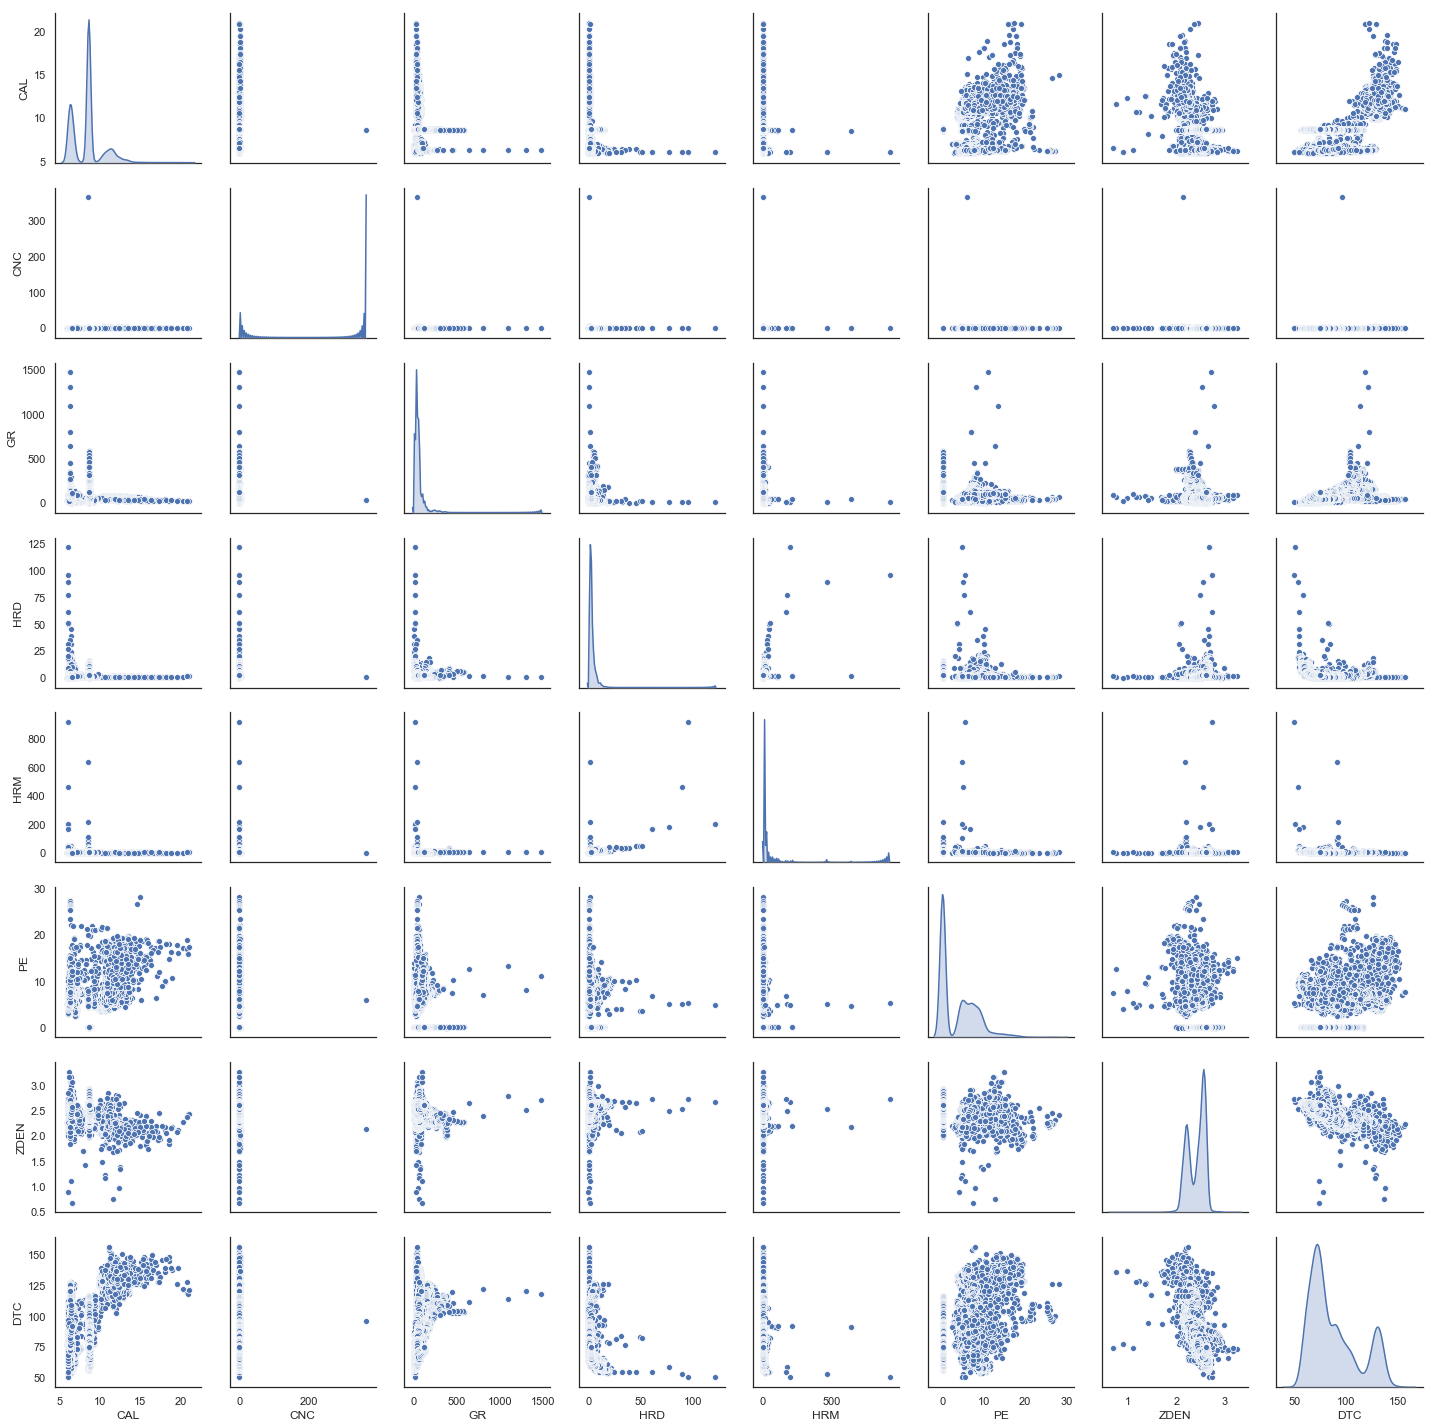

In [30]:
sns.set()
sns.set_style("white")
sns.pairplot(df_train, diag_kind="kde")

## Data preprocessing 

The [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. In general, learning algorithms benefit from standardization of the data set. If some outliers are present in the set, robust scalers or transformers are more appropriate. In this example, will use Standard Scaler.

In [31]:
def make_log_plot(df):
    
    color_list = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
    feature_names = df.columns.tolist()  
    feature_num = len(feature_names)
    Depth = np.linspace(0,len(df[feature_names[0]]),len(df[feature_names[0]]))
   
    f, ax = plt.subplots(nrows=1, ncols=feature_num, figsize=(12, 12))

    for i in range(len(ax)):
        log = df[feature_names[i]]
        ax[i].plot(log, Depth, '-', color=color_list[i])
        ax[i].set_ylim(Depth.min(),Depth.max())
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
        ax[i].set_xlabel(feature_names[i])
        ax[i].set_xlim(log.min(),log.max())
        if i > 0:
            ax[i].set_yticklabels([]); 
    f.suptitle('Well logs', fontsize=14,y=0.94)

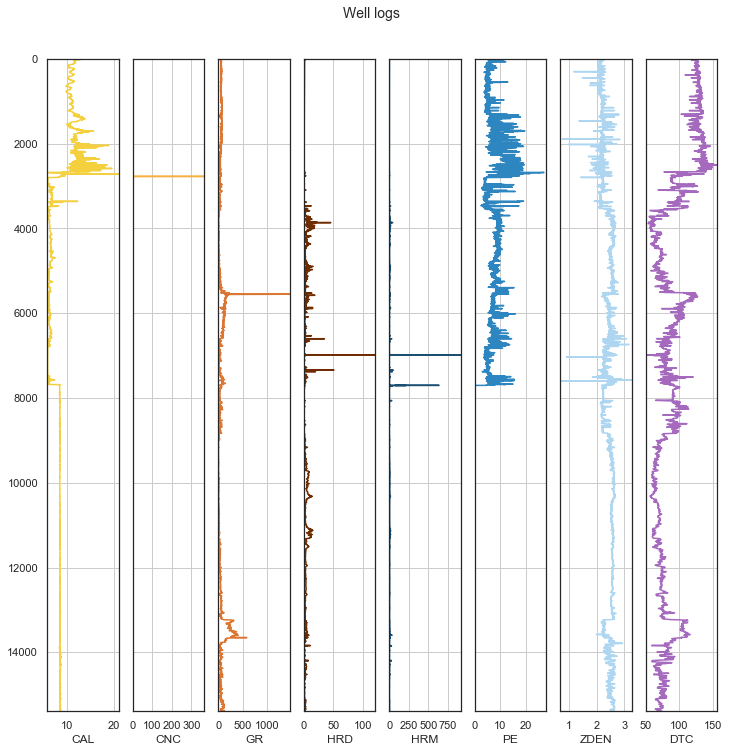

In [32]:
make_log_plot(df_train)

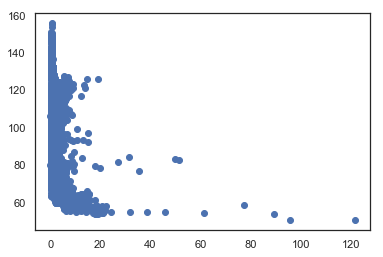

In [33]:
#sns.pairplot(df[['CAL', 'DTC']])
plt.scatter(df_train['HRD'], df_train['DTC'])
plt.show()

## Train-Test Split

Let us split the data into random train and test subsets. In scikit-learn a random split into training and test sets can be quickly computed with the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  helper function.

In [34]:
df_train_data = np.array(df_train)

X_train = df_train_data[:,:-1]
y_train = df_train_data[:,-1]

X_test = df_test.values


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Size of the X_train dataset: ' + str(X_train.shape))
print('Size of the y_train dataset: ' + str(y_train.shape))
print('Size of the X_test dataset: ' + str(X_test.shape))

Size of the X_train dataset: (15393, 7)
Size of the y_train dataset: (15393,)
Size of the X_test dataset: (5132, 7)


## Random Forest model

In [35]:
reg = RandomForestRegressor()

reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

## Save submission

In [36]:
sample_submission = pd.read_csv('data/sample_submission.csv')

new_submission = sample_submission
new_submission['DTC'] = y_pred

filename = 'new_submission_example.csv'
new_submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: new_submission_example.csv


## Plot predicted results 

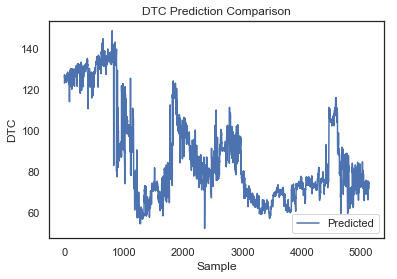

In [49]:
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('DTC')
plt.title('DTC Prediction Comparison')
plt.legend(loc='lower right')
plt.show()